In [23]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('DataAnalyst.csv')

In [32]:
# 1. Preparación de etiquetas
roles = ['Data Analyst', 'Data Scientist', 'Data Engineer', 'Business Analyst']
techs = ['Python', 'SQL', 'Excel', 'Tableau', 'Power BI']

In [34]:
# 2. Lógica limpia con NumPy: 
# Creamos una matriz booleana donde cada fila es un rol y cada columna una oferta
# .values convierte la serie de Pandas en un array de NumPy para mayor velocidad
matriz_presencia = np.array([df['Job Description'].str.contains(r, case=False, na=False).values for r in roles])

# Sumamos las filas para obtener el total de menciones por cada rol
frecuencias = matriz_presencia.sum(axis=1)

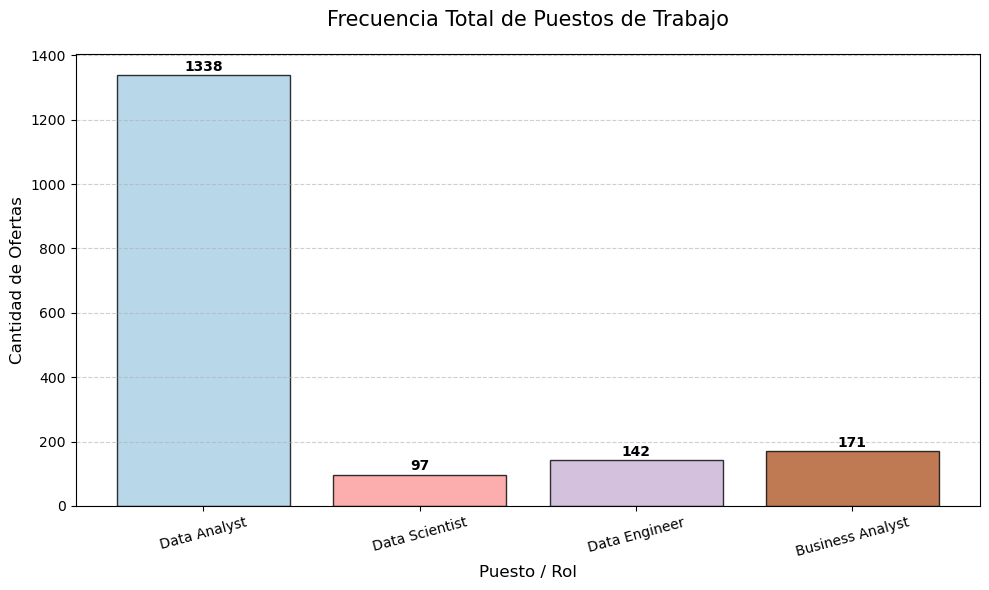

In [36]:
# 3. Representación con Matplotlib
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras
colores = plt.cm.Paired(np.linspace(0, 1, len(roles))) # Colores automáticos
plt.bar(roles, frecuencias, color=colores, edgecolor='black', alpha=0.8)

# Añadimos etiquetas de datos sobre cada barra para mayor claridad
for i, v in enumerate(frecuencias):
    plt.text(i, v + (max(frecuencias) * 0.01), str(v), ha='center', fontweight='bold')

# Configuración estética
plt.title('Frecuencia Total de Puestos de Trabajo', fontsize=15, pad=20)
plt.ylabel('Cantidad de Ofertas', fontsize=12)
plt.xlabel('Puesto / Rol', fontsize=12)
plt.xticks(rotation=15) # Inclinamos un poco los nombres para que no se encimen
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [26]:
# 2. Lógica Vectorizada con NumPy (Sin bucles sobre las filas)
# Creamos una matriz de presencia para Roles y otra para Tecnologías
# Cada fila de estas matrices representa una palabra clave y cada columna una oferta de empleo
matriz_roles = np.array([df['Job Description'].str.contains(r, case=False, na=False).values for r in roles])
matriz_techs = np.array([df['Job Description'].str.contains(t, case=False, na=False).values for t in techs])

In [27]:
# El "Producto Punto" (@) calcula instantáneamente la intersección entre cada par
# Resultado: Una matriz de (Tecnologías x Roles) con las frecuencias exactas
conteo_final = matriz_techs.astype(int) @ matriz_roles.astype(int).T

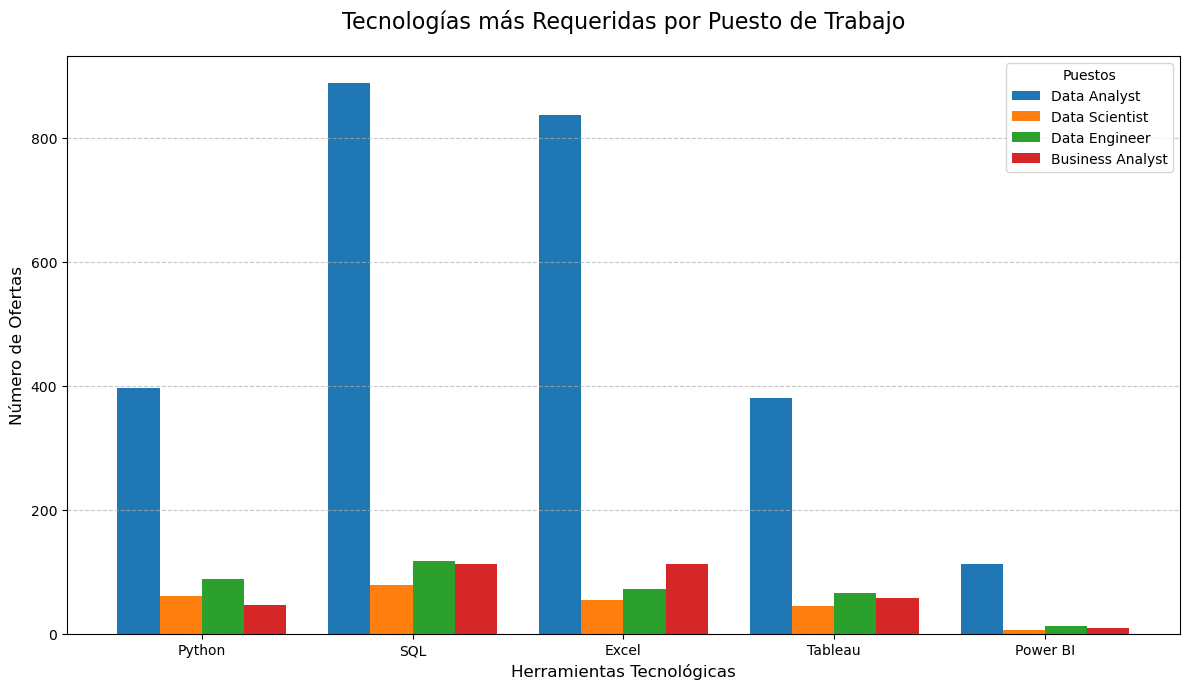

In [31]:
# 3. Construcción del Gráfico Agrupado en Matplotlib
x = np.arange(len(techs))  # Posiciones de las tecnologías en el eje X
ancho_barra = 0.2          # Ancho de cada barra individual

fig, ax = plt.subplots(figsize=(12, 7))

# Dibujamos un grupo de barras por cada rol
for i, nombre_rol in enumerate(roles):
    # Calculamos el desplazamiento para que las barras no se encimen
    desplazamiento = (i - len(roles)/2 + 0.5) * ancho_barra
    ax.bar(x + desplazamiento, conteo_final[:, i], ancho_barra, label=nombre_rol)

# Configuración estética del gráfico
ax.set_title('Tecnologías más Requeridas por Puesto de Trabajo', fontsize=16, pad=20)
ax.set_ylabel('Número de Ofertas', fontsize=12)
ax.set_xlabel('Herramientas Tecnológicas', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(techs)
ax.legend(title="Puestos")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Al haber mas ofertas de trabajo de Data Analyst esto da a que la barra de esta se haya elevado mas que las anteriores